# Lab | Revisiting Machine Learning Case Study

- In this lab, you will use learningSet.csv file which you already have cloned in today's activities.

## Instructions
Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns

- Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    - OSOURCE - symbol definitions not provided, too many categories
    - ZIP CODE - we are including state already

- Identify columns that over 85% missing values

- Remove those columns from the dataframe

- Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer


In [96]:
df  = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/machine-learning/lab-revisiting-machine-learning/learningSet.csv')
                  

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [97]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


### Check for null values in all the columns

In [98]:
df.isnull().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

### Excluding columns: OSOURCE, ZIP

In [99]:
drop_list = ['OSOURCE', 'ZIP']
df = df.drop(columns=drop_list)



### Identify columns that over 85% missing values

In [100]:
missing_percentage = df.isnull().sum() / len(df)
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_filtered = missing_percentage_sorted[missing_percentage_sorted > 0.85]


print("Columns with more than 85% missing values:")
print(missing_percentage_filtered)


Columns with more than 85% missing values:
RDATE_5     0.999906
RAMNT_5     0.999906
RDATE_3     0.997464
RAMNT_3     0.997464
RDATE_4     0.997055
RAMNT_4     0.997055
RAMNT_6     0.991867
RDATE_6     0.991867
RAMNT_15    0.923888
RDATE_15    0.923888
RDATE_23    0.917631
RAMNT_23    0.917631
RDATE_20    0.917327
RAMNT_20    0.917327
RAMNT_7     0.906773
RDATE_7     0.906773
RAMNT_17    0.901469
RDATE_17    0.901469
RDATE_21    0.900296
RAMNT_21    0.900296
RAMNT_10    0.890360
RDATE_10    0.890360
RAMNT_13    0.871609
RDATE_13    0.871609
NUMCHLD     0.870184
dtype: float64


### Remove those columns from the dataframe

In [101]:
columns_to_drop = missing_percentage[missing_percentage > 0.85].index
df.drop(columns=columns_to_drop, inplace=True)



### Modify values in Gender Column

In [102]:
print(df['GENDER'].value_counts())
df['GENDER'] = df['GENDER'].fillna('F')

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [103]:
Other = [' ', 'C', 'U', 'J', 'A']

df['GENDER'] = df['GENDER'].replace(Other, 'Other')


In [104]:
print(df['GENDER'].value_counts())


F        51277
M        39094
Other     5041
Name: GENDER, dtype: int64


# Lab | Feature engineering

## Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
- Use appropriate EDA technique where ever necessary.

In [105]:
numeric_columns = df.select_dtypes(include=['number'])

numeric_columns.isnull().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
INCOME      21286
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 382, dtype: int64

In [106]:
selected_colums = df[['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']]
selected_null = selected_colums.isnull().sum()
print(selected_null)

GEOCODE2      132
WEALTH1     44732
ADI           132
DMA           132
MSA           132
dtype: int64


In [107]:
selected_null / len(df) * 100

GEOCODE2     0.138347
WEALTH1     46.882992
ADI          0.138347
DMA          0.138347
MSA          0.138347
dtype: float64

In [108]:
selected_colums.dtypes

GEOCODE2     object
WEALTH1     float64
ADI         float64
DMA         float64
MSA         float64
dtype: object

In [109]:
for col in selected_colums:
     print(selected_colums[col].unique())

['C' 'A' 'D' 'B' ' ' nan]
[nan  9.  1.  4.  2.  6.  0.  5.  8.  3.  7.]
[177.  13. 281.  67. 127. 185.  91. 251. 391. 181. 269.  83. 107. 249.
 291.  57. 227. 329. 351.  55. 133.  51.  73. 159. 201.  75. 233. 591.
 203. 175.  59. 105. 111. 173. 415. 323. 187.  65. 412. 109. 425. 405.
 197. 279. 645. 207.  89. 361. 209. 213.  15.  21. 113. 131. 469. 199.
 129. 441. 459. 235. 301.  39. 429. 285. 245. 335. 393. 577. 439. 455.
 383. 263.   0. 427. 307. 275. 119. 229. 273. 325. 371. 377. 315. 342.
 421. 219.  61.  93. 375. 283. 381. 243. 353. 613. 339. 367. 417. 299.
 271. 157.  77. 327.  53.  87. 451. 627.  71. 253. 363. 403. 115. 389.
  63. 321. 448. 237. 217. 241. 123. 221. 165. 277.  85. 319. 247.  69.
 379.  95.  17. 625. 462. 303. 179. 331. 231. 337. 257. 409. 457. 359.
 373.  nan 413. 215. 205. 313. 211. 305. 355. 419. 473. 423. 121. 433.
 431. 465. 445.  19. 467. 255. 437. 117. 449. 195. 435. 621. 295.  11.
 183. 265. 317.   9.   3. 151. 471. 293. 297. 603. 385.  33. 261.  25.
 443.

In [110]:
# GEOCODE2 missing value is very small amount (only 0.1 %), also empty values are only 187 > we will replace " " and missing values as 'A' which is the most frequent value which is 'A' 
df['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [111]:
df['GEOCODE2'].fillna('A', inplace=True)
df['GEOCODE2'] = df['GEOCODE2'].replace(' ', 'A')
df['GEOCODE2'].value_counts()


A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [112]:
# The initial assigned dtype for WEALTH1 is float. But it seems more categorical with hierarchical order (1~9). So we convert this into object dtype
df['WEALTH1'] = df['WEALTH1'].astype('object')

df['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [113]:
# the missing values for WEALTH1 is quite significant amount (46%). We will either remove the entire column if not signifcant features.
df['WEALTH1'].isnull().sum() / len(df) * 100

46.882991657233895

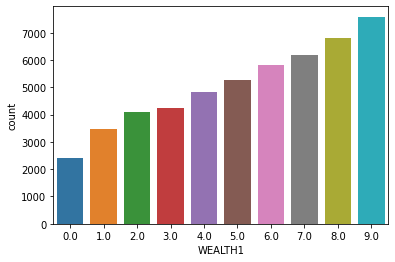

In [114]:

sns.countplot(data=df, x='WEALTH1')

plt.show()

In [115]:
# Since the missing values for WEALTH1 is quite significant percentage + I have no domain knowledge if this feature is imprtant, instead of removing entire columns I will use KNN imputer

imputer = KNNImputer(n_neighbors=2)

df['WEALTH1'] = imputer.fit_transform(df['WEALTH1'].values.reshape(-1, 1))



In [116]:
df.columns

Index(['ODATEDW', 'TCODE', 'STATE', 'MAILCODE', 'PVASTATE', 'DOB', 'NOEXCH',
       'RECINHSE', 'RECP3', 'RECPGVG',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=454)

<AxesSubplot:xlabel='ADI', ylabel='Count'>

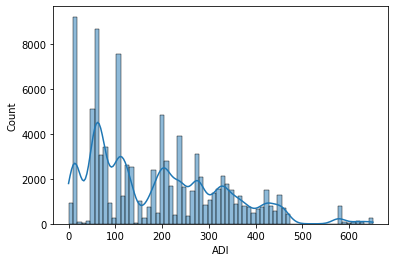

In [117]:
sns.histplot(df[df['ADI'].notna()]['ADI'],kde=True) 

In [118]:
df['ADI'].mean()

187.35640218303945

In [119]:
df['ADI'].median()

175.0

<AxesSubplot:xlabel='DMA', ylabel='Count'>

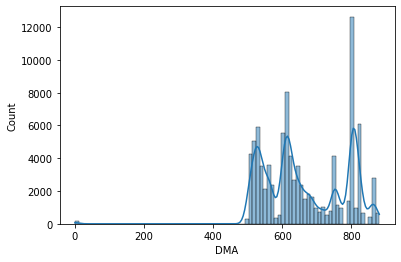

In [120]:
sns.histplot(df[df['DMA'].notna()]['DMA'],kde=True) 

<AxesSubplot:xlabel='MSA', ylabel='Count'>

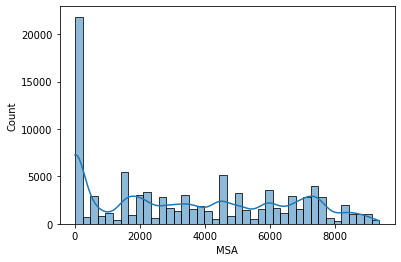

In [121]:
sns.histplot(df[df['MSA'].notna()]['MSA'],kde=True) 

In [122]:
# it looks like the numeirc features does not have strong correaltion with TARGET_D, so even if we remove those entire columns, the model should not be biased
df_corr = df[['TARGET_D','GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']]
df_corr.corr()["TARGET_D"].sort_values(ascending=False)

TARGET_D    1.000000
DMA         0.022048
WEALTH1     0.017725
MSA         0.015054
ADI        -0.012700
Name: TARGET_D, dtype: float64

In [123]:
df = df.drop(columns=['DMA', 'ADI', 'MSA'])

### Techiqnues employed for treaing missing values
- GEOCODE2: Mode
- WEALTH1: KNN imputation
- ADI: 
- DMA
- MSA